In [1]:
import pandas as pd
import numpy as np

#导入pyplot模块
import matplotlib.pyplot as plt

#使用中文字体
from pylab import mpl
mpl.rcParams['font.sans-serif']="Simsun"
mpl.rcParams['axes.unicode_minus']=False

#使用svg格式，避免图形模糊
%matplotlib inline
%config InlineBackend.figure_format="svg"

#设置缺省颜色和线型
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = (
    cycler(color=['steelblue', 'lightcoral', 'forestgreen', 'darkorange']) 
    + cycler(linestyle=['-', '--', '-.', ':']))


In [1]:
import pandas as pd
import numpy as np

#导入pyplot模块
import matplotlib.pyplot as plt

#使用中文字体
from pylab import mpl
mpl.rcParams['font.sans-serif']="Simsun"
mpl.rcParams['axes.unicode_minus']=False

#使用svg格式，避免图形模糊
%matplotlib inline
%config InlineBackend.figure_format="svg"

#设置缺省颜色和线型
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = (
    cycler(color=['steelblue', 'lightcoral', 'forestgreen', 'darkorange']) 
    + cycler(linestyle=['-', '--', '-.', ':']))


在获得（导入）数据后，我们需要先去了解DataFrame中的数据的基本特性。

除了**columns**和**dtypes**外，本节中的大部分方法同时适用于DataFrame和Series（列）。用于DataFrame时，一般可以看成是对各列分别计算。

# 查看部分数据

当Series或DataFrame中包含很多（行）数据时，将其全部显示出来会占用大量的时间和显示空间。因此一般的做法是查看部分数据：
 * **head**方法显示前若干条数据
 * **tail**方法显示末尾的若干条数据

In [2]:
# 从scikit-learn库中导入iris样本数据集
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#显示前4条数据
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [3]:
#显示最后10条数据
df.tail(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


# 查看行列信息

通过**columns**、**index**和**dtypes**可以获取DataFrame的列、行和各列的类型等信息。

In [4]:
# 列名

df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
# 各行标签

df.index

RangeIndex(start=0, stop=150, step=1)

In [6]:
# 各列类型

df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

# 转置

在绘制某些柱状图时我们需要将DataFrame进行行列转置。通过**T**属性可以访问DataFrame的转置视图。

In [7]:
d=np.linspace(1,8,8).reshape(4,2)
df=pd.DataFrame(d,columns=['one','two'],index=['a','b','c','d'])
print(df)
df.T

   one  two
a  1.0  2.0
b  3.0  4.0
c  5.0  6.0
d  7.0  8.0


,a,b,c,d
one,1.0,3.0,5.0,7.0
two,2.0,4.0,6.0,8.0


# 数值型和时间型数据

## 描述性统计

### describe
在探索性数据分析中，我们可以直接使用**describe**方法查看Series或DataFrame各列的描述性统计信息。

对于元素类型为数值型和时间型的Series，describe方法会显示均值、标准差、最大值、最小值、各四分位数（50%分位数就是中位数）等统计信息。在缺省的情况下，describe只会列出DataFrame中类型为数值型和时间型的各列。

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 其他描述性统计

除了**describe**外, DataFrame提供了一系列方法可以逐列计算对应的统计量
 * **count**计算非NA的元素个数
 * **sum**计算元素的和
 * **mean**计算均值
 * **median**计算中位数
 * **min**和**max**计算最大值和最小值
 * **idxmin**和**idxmax**返回最大值和最小值所在的位置
 * **mode**计算众数
 * **prod**计算所有元素的乘积
 * **std**计算标准差
 * **var**计算方差
 * **sem**计算标准误
 * **skew**计算偏度（三阶矩）
 * **kurt**计算峰度（四阶矩）
 * **quantile** 计算分位数

In [9]:
# 从scikit-learn库中导入iris样本数据集
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

## 数据可视化

可使用DataFrame的**hist**,**boxplot**,**plot**,**plot.scatter**,**bar**，**plot.pie**,**plot.density**等方法直接绘制数据的可视化图形。

### 直方图

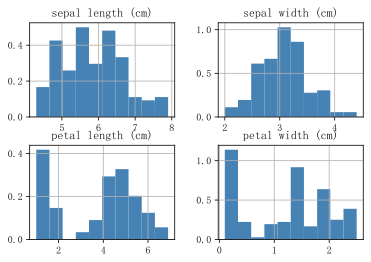

In [10]:
# 直方图
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.hist(density=True)
plt.show()

### 箱型图

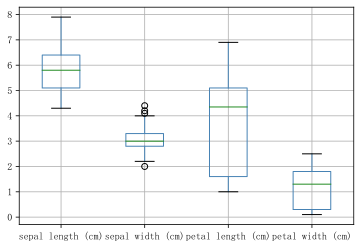

In [11]:
## 绘制箱型图
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.boxplot()
plt.show()

### 柱形图

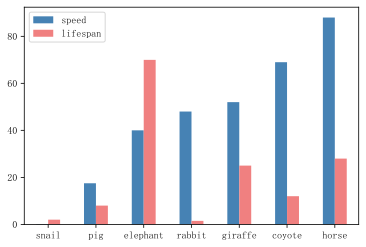

In [12]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

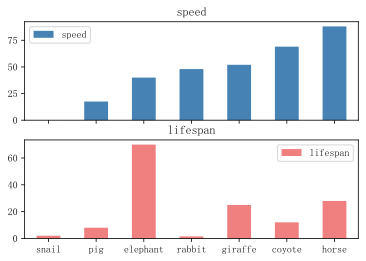

In [13]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0,subplots=True)

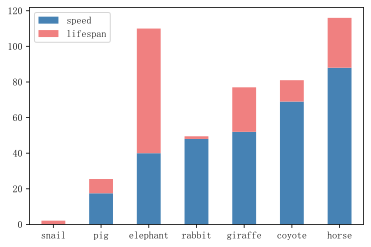

In [14]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0,stacked=True)

# 相关分析

## 关系统计量
除了**describe**外, DataFrame还可以计算两两列之间的统计关系：
 * **corr**计算相关系数
 * **cov**计算协方差

In [15]:
# 从scikit-learn库中导入iris样本数据集
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# 计算相关系数
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## 可视化分析

用**scatter_matrix**函数可以绘制两两列之间的散点图，直观的展示列和列之间的相关关系

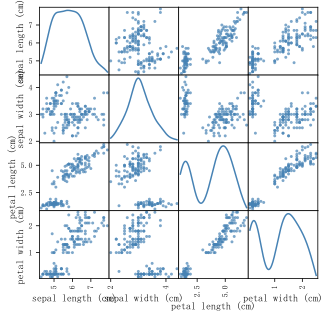

In [16]:
from pandas.plotting import scatter_matrix

from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#两两绘制散点图
scatter_matrix(df, alpha=0.7, figsize=(5, 5), diagonal="density");

# 自相关分析

对时间序列数据，需要了解变量是否存在自相关性。本例中使用的例子是8个国家货币的汇率数据，从1996到2005.

In [17]:
df=pd.read_csv("../exchange_rate.csv")
df.head()

,Australia,British,Canada,Switzerland,China,Japan,New Zealand,Singapore
0,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.5930,0.525486
1,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.5940,0.523972
2,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.5973,0.526316
3,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.5970,0.523834
4,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.5985,0.527426


## 自相关统计量

Series对象的**autocorr**方法可以计算指定期数的**自相关系数**。

In [18]:
df["China"].autocorr()

0.9980886171348745

## 可视化分析


### 自相关系数图

**autocorrelation_plot**可以Series的自相关系数图。

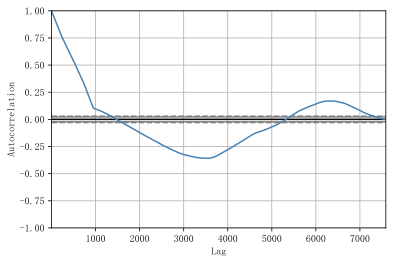

In [19]:
# 自相关系数图
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df["China"]);
plt.show()

### 迟滞散点图

**lag_plot**绘制Series和迟滞(lag)指定期数后的散点图

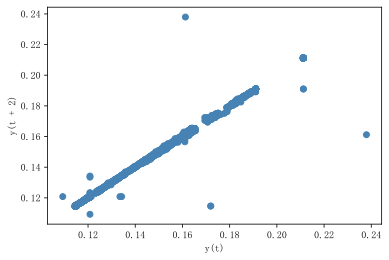

In [20]:
from pandas.plotting import lag_plot
lag_plot(df["China"],lag=2)
plt.show()